In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE  # Assuming you have imblearn installed
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
df=pd.read_csv('creditcard.csv')
df.head()
df_clean = df.dropna()  # Ensure no NaN values are present
X = df_clean.drop(columns=['Class'])
y = df_clean['Class']

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Preprocessing the data

In [10]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


<Axes: xlabel='Class', ylabel='count'>

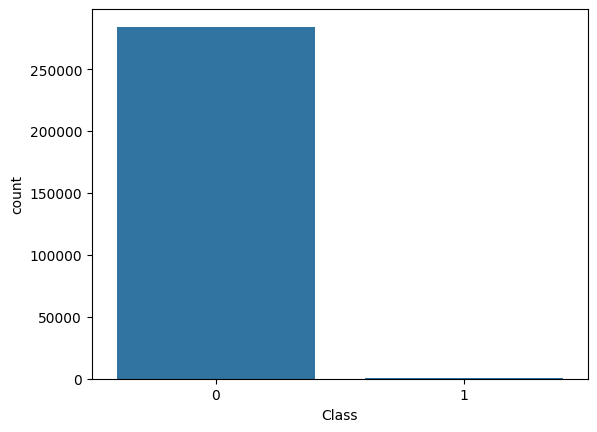

In [11]:
sns.countplot(x='Class',data=df)

In [ ]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)

# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

Input Split

In [13]:
X = df.drop(columns=['Class'], axis=1)
y = df['Class']


Standard Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)
x_scaler[-1]

array([ 1.64205773, -0.27233093, -0.11489898,  0.46386564, -0.35757   ,
       -0.00908946, -0.48760183,  1.27476937, -0.3471764 ,  0.44253246,
       -0.84072963, -1.01934641, -0.0315383 , -0.18898634, -0.08795849,
        0.04515766, -0.34535763, -0.77752147,  0.1997554 , -0.31462479,
        0.49673933,  0.35541083,  0.8861488 ,  0.6033653 ,  0.01452561,
       -0.90863123, -1.69685342, -0.00598394,  0.04134999,  0.51435531])

Model Training

In [15]:
print("NaN Count in x_scaler:", np.isnan(x_scaler).sum())
print("NaN Count in y:", y.isnull().sum())

NaN Count in x_scaler: 0
NaN Count in y: 0


In [16]:
# Drop NaN values before scaling
df_clean = df.dropna()

# Separate features and target only from the cleaned DataFrame
X = df_clean.drop(columns=['Class'], axis=1)
y = df_clean['Class']

# Perform standard scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(X)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.25, random_state=42, stratify=y)

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.84      0.62      0.71       123

    accuracy                           1.00     71202
   macro avg       0.92      0.81      0.85     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.7102803738317757


In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.96      0.77      0.86       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.8558558558558559


In [19]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.79      0.86       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.8622222222222222


Class Imbalance

In [61]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [62]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train_smote, y_train_smote)  # Training with SMOTE data
y_pred_log = log_model.predict(x_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.11       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202

F1 Score: 0.11082867310625318


In [63]:
rf_model = RandomForestClassifier(n_jobs=-1)
rf_model.fit(x_train_smote, y_train_smote)  # Training with SMOTE data
y_pred_rf = rf_model.predict(x_test)
print("Random Forest Classifier")
print(classification_report(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))


Random Forest Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.88      0.80      0.84       123

    accuracy                           1.00     71202
   macro avg       0.94      0.90      0.92     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.8376068376068376


In [65]:
xgb_model = XGBClassifier(n_jobs=-1)
xgb_model.fit(x_train_smote, y_train_smote)  # Training with SMOTE data
y_pred_xgb = xgb_model.predict(x_test)
print("XGBoost Classifier")
print(classification_report(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

XGBoost Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.72      0.85      0.78       123

    accuracy                           1.00     71202
   macro avg       0.86      0.92      0.89     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score: 0.7761194029850746
